### 연습
- 정상영업/폐업 상관없이 현 시점(파일기준) 치킨집의 인허가 분포도(25개 자치구별)
    - 동x
- 영업상태가 폐업인 업장의 자치구별 분포도(업종 일반음식점인 업장)
    - 폐업이 얼마나 되는지 음식점의 폐업율을 확인
- 강남구의 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각에 대해 시각화)
    - 치킨집 -> 중국집
    - 서대문구 -> 강남구 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [8]:
data = pd.read_csv('../data/서울특별시_일반음식점.csv', encoding = 'cp949', low_memory = False)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

## 정상영업/폐업 상관없이 현 시점(파일기준) 치킨집의 인허가 분포도(25개 자치구별)

In [103]:
set(data.소재지전체주소.values)

{'서울특별시 양천구 목동 797-4번지',
 '서울특별시 강서구 마곡동 795-7 열린프라자(지상 4층) 401호',
 '서울특별시 서초구 방배동 952-8번지',
 '서울특별시 서초구 우면동 66-2번지 세신상가 211  호',
 '서울특별시 동작구 신대방동 618-26번지',
 '서울특별시 강동구 천호동 400-3번지',
 '서울특별시 강남구 청담동 119-8번지 지하1층~지상5층',
 '서울특별시 영등포구 대림동 976-54번지',
 '서울특별시 영등포구 영등포동4가 69-1번지',
 '서울특별시 서초구 서초동 1676-4번지 4층 4호',
 '서울특별시 마포구 공덕동 249-24번지',
 '서울특별시 강남구 청담동 50-2번지 가호',
 '서울특별시 서초구 반포동 58-9번지 지하1층',
 '서울특별시 마포구 망원동 414-56',
 '서울특별시 송파구 문정동 68-10번지',
 '서울특별시 중랑구 망우동 525-4',
 '서울특별시 광진구 구의동 548-102번지 현대상가 지하동 104호',
 '서울특별시 서대문구 대현동 56-104번지 지상1층',
 '서울특별시 마포구 창전동 5-73번지 1층일부',
 '서울특별시 노원구 공릉동 602-2번지',
 '서울특별시 관악구 봉천동 880-3번지',
 '서울특별시 서초구 양재동 269-3번지 1층 2호',
 '서울특별시 강북구 수유동 192-61 영남빌딩 5층(구청길 22)',
 '서울특별시 송파구 방이동 136-13번지',
 '서울특별시 중랑구 중화동 324-1번지',
 '서울특별시 동작구 사당동 249-11번지',
 '서울특별시 중구 북창동 92번지 (지상1층)',
 '서울특별시 송파구 오금동 160번지 삼성아파트 상가 1층 110호',
 '서울특별시 중구 봉래동2가 1-45번지',
 '서울특별시 양천구 신월동 106-22번지',
 '서울특별시 동작구 신대방동 644-7',
 '서울특별시 영등포구 여의도동 14-21번지 엘지에클라트 비02호',
 '서울특별시 금천구 시흥동 895-6번지 1층',
 '서

In [10]:
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na = False)])

{'통닭(치킨)', '호프/통닭'}

In [13]:
data_fin = data[data.위생업태명.isin(['통닭(치킨)', '호프/통닭'])]
data_fin.head(5)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
30,31,일반음식점,07_24_04_P,3110000,3110000-101-1999-06737,19991113,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,60.28,NaN,NaN,NaN,NaN
43,44,일반음식점,07_24_04_P,3180000,3180000-101-2001-14282,20010818,NaN,1,영업/정상,1,...,0.0,NaN,0.0,0,N,12.00,NaN,NaN,NaN,NaN
44,45,일반음식점,07_24_04_P,3010000,3010000-101-2001-13779,20010521,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,28.60,NaN,NaN,NaN,NaN
66,67,일반음식점,07_24_04_P,3000000,3000000-101-2002-11870,20020205,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,41.87,NaN,NaN,NaN,NaN
67,68,일반음식점,07_24_04_P,3210000,3210000-101-2000-15274,20001201,NaN,1,영업/정상,1,...,NaN,NaN,NaN,NaN,N,19.80,NaN,NaN,NaN,NaN


In [15]:
set(data_fin.위생업태명) # data_fin : 서울시의 치킨집의 인허가 데이터

{'통닭(치킨)', '호프/통닭'}

In [22]:
res = data_fin.소재지전체주소.str.split(' ')
res

30                       [서울특별시, 은평구, 갈현동, 400-9번지, (지하1층)]
43        [서울특별시, 영등포구, 양평동3가, 101번지, 현대아파트, 상가내, 1층, 102호]
44                           [서울특별시, 중구, 필동2가, 32-24번지, 1층]
66                      [서울특별시, 종로구, 당주동, 128-17번지, (지상1층)]
67                            [서울특별시, 서초구, 우면동, 59번지, 105호]
                                ...                        
472851                    [서울특별시, 서대문구, 연희동, 135-5, 1층, 4호]
472857                            [서울특별시, 동대문구, 장안동, 377-9]
472872                  [서울특별시, 강남구, 자곡동, 619, 엘에이치강남힐스테이트]
472888                       [서울특별시, 노원구, 상계동, 593-2, 동원빌딩]
472905    [서울특별시, 강서구, 화곡동, 980-21, 강서아이파크(지하, 1층,, B01-...
Name: 소재지전체주소, Length: 44480, dtype: object

In [33]:
fin_t = []
for idx in res.index :
    try:
        fin_t.append(res.loc[idx][1])
    except:
        pass
# TypeError: 'float' object is not subscriptable -> 결측치가 있어서, null data가 있기 때문에 발생하는 오류

In [37]:
fin_s = pd.Series(fin_t)
fin_s.value_counts()

마포구     2819
강동구     2791
구로구     2700
양천구     2476
관악구     2369
중랑구     2284
동대문구    2205
영등포구    2159
광진구     2159
은평구     2025
노원구     1823
성북구     1804
송파구     1750
금천구     1712
강북구     1681
강서구     1667
서초구     1623
도봉구     1532
성동구     1509
동작구     1185
강남구     1167
서대문구    1132
중구       718
용산구      641
종로구      525
성남시        1
Name: count, dtype: int64

In [41]:
fin_s[fin_s == '성남시'].index

Index([20180], dtype='int64')

In [43]:
fin = fin_s.drop(fin_s[fin_s == '성남시'].index).value_counts()
fin

마포구     2819
강동구     2791
구로구     2700
양천구     2476
관악구     2369
중랑구     2284
동대문구    2205
광진구     2159
영등포구    2159
은평구     2025
노원구     1823
성북구     1804
송파구     1750
금천구     1712
강북구     1681
강서구     1667
서초구     1623
도봉구     1532
성동구     1509
동작구     1185
강남구     1167
서대문구    1132
중구       718
용산구      641
종로구      525
Name: count, dtype: int64

<Axes: >

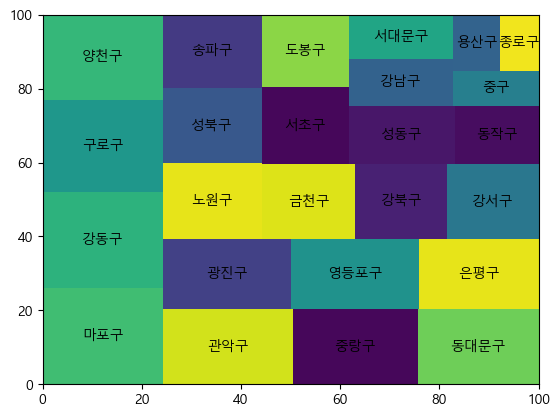

In [44]:
import squarify
squarify.plot(fin, label = fin.index)